## Analyse Nutzung
Überblick über die Nutzungsart der Gebäude

In [138]:
import pandas as pd
import dataset.charts as charts
import dataset.importer as im
import seaborn as sns
import matplotlib.pyplot as plt

df = im.get_dataset('dataset/dataset.csv')
pd.set_option('display.max_rows', 500)  # to show all value_counts


#### Verteilung im Datenset


In [139]:
df[im.FIELD_USAGE_CLUSTER].value_counts()

WOHNEN           244
SCHULEN          163
HALLEN            88
BUERO             86
BETRIEB           61
BEHERBERGUNG      56
KULTUS_KULTUR     26
GESUNDHEIT        24
ANDERES           14
OFFENE_BAUTEN      8
TECHNIK            8
IRRELEVANT         7
AUSSENANLAGEN      1
Name: usage_cluster, dtype: int64

In [140]:
df[im.FIELD_NOM_USAGE_MAIN].value_counts()


WOHNBAUTEN__MFH_MEDIUM                                                                108
SCHULBAUTEN__VOLKSSCHULEN                                                              87
FREIZEITBAUTEN_SPORTBAUTEN_ERHOLUNGSBAUTEN__TURNHALLEN_SPORTHALLEN_MEHRZWECKHALLEN     43
WOHNBAUTEN__MFH_LOW                                                                    31
WOHNBAUTEN__EFH_REIHEN_MEDIUM                                                          28
VERKEHRSBAUTEN__WERKHOEFE                                                              28
SCHULBAUTEN__KINDERGAERTEN_HORTE                                                       28
BUEROBAUTEN__VOLLAUSBAU                                                                27
WOHNBAUTEN__MFH_HIGH                                                                   25
VERWALTUNGSBAUTEN                                                                      23
WOHNBAUTEN__EFH_REIHEN_HIGH                                                            19
GESUNDHEIT

## Nutzungen kombinieren
Der Datensatz enthält sehr unterschiedliche Datenmengen pro Nutzungstyp. Wenn zu wenig Daten vorhanden sind, macht das Verwenden des Felds 'usage_cluster' oder weiteres Zusammenfassen Sinn. Für Nutzungstypen mit vielen Daten (Wohnen, Schulen etc.) macht es Sinn, ein spezifischeren Typ zu verwenden.

**Mehrfamilienhäuser**<br>
WOHNBAUTEN__MFH_MEDIUM<br>
WOHNBAUTEN__MFH_LOW<br>
WOHNBAUTEN__MFH_HIGH<br>

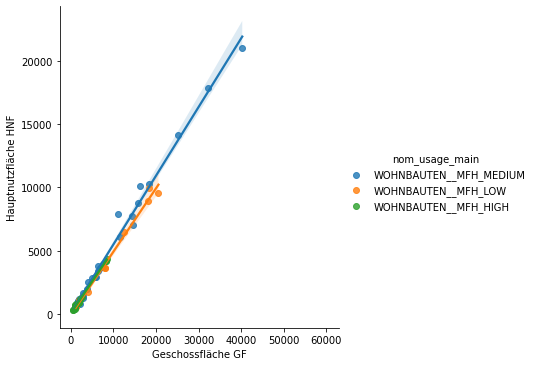

In [141]:
types_wohnen_mfh = ['WOHNBAUTEN__MFH_HIGH', 'WOHNBAUTEN__MFH_MEDIUM', 'WOHNBAUTEN__MFH_LOW']
mfh_df = df[df[im.FIELD_NOM_USAGE_MAIN].isin(types_wohnen_mfh)]

charts.lmplot_gf_hnf(mfh_df, hue=im.FIELD_NOM_USAGE_MAIN)

**Einfamilienhäuser**<br>
WOHNBAUTEN__EFH_REIHEN_LOW<br>
WOHNBAUTEN__EFH_REIHEN_MEDIUM<br>
WOHNBAUTEN__EFH_REIHEN_HIGH

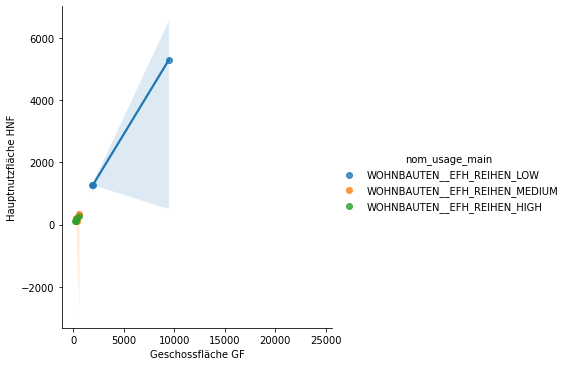

In [142]:
types_wohnen_efh = ['WOHNBAUTEN__EFH_REIHEN_LOW', 'WOHNBAUTEN__EFH_REIHEN_MEDIUM', 'WOHNBAUTEN__EFH_REIHEN_HIGH']
efh_df = df[df[im.FIELD_NOM_USAGE_MAIN].isin(types_wohnen_efh)]

charts.lmplot_gf_hnf(efh_df, hue=im.FIELD_NOM_USAGE_MAIN)

**Schulen sinnvoll aufteilen?**<br>
SCHULBAUTEN__VOLKSSCHULEN<br>
SCHULBAUTEN__KINDERGAERTEN_HORTE<br>
SCHULBAUTEN__BERUFSSCHULEN<br>
SCHULBAUTEN__HOCHSCHULEN_UNIVERSITAETEN<br>
SCHULBAUTEN__FORSCHUNGSBAUTEN_MIT_LABOR<br>
SCHULBAUTEN__BIBLIOTHEKEN<br>
SCHULBAUTEN__FORSCHUNGSBAUTEN_OHNE_LABOR<br>
SCHULBAUTEN__HEILPAEDAGOGISCHE_SONDERSCHULEN<br>

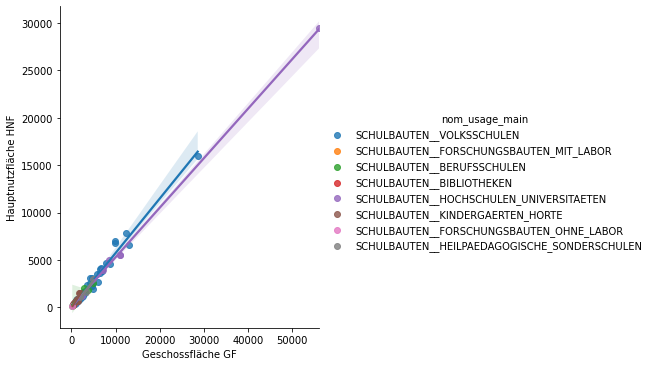

In [143]:
types_schulen = ['SCHULBAUTEN__VOLKSSCHULEN',
                 'SCHULBAUTEN__KINDERGAERTEN_HORTE',
                 'SCHULBAUTEN__BERUFSSCHULEN',
                 'SCHULBAUTEN__HOCHSCHULEN_UNIVERSITAETEN',
                 'SCHULBAUTEN__FORSCHUNGSBAUTEN_MIT_LABOR',
                 'SCHULBAUTEN__BIBLIOTHEKEN',
                 'SCHULBAUTEN__FORSCHUNGSBAUTEN_OHNE_LABOR',
                 'SCHULBAUTEN__HEILPAEDAGOGISCHE_SONDERSCHULEN'
                 ]
schulen_df = df[df[im.FIELD_NOM_USAGE_MAIN].isin(types_schulen)]

charts.lmplot_gf_hnf(schulen_df, hue=im.FIELD_NOM_USAGE_MAIN)

**Rest**<br>
Vermutlich vorerst auf Usage Cluster zurückgreifen.


## Ausreisser
Ausreisser bei den Usage Clustern.
Entspricht den Ratios HFN - GF --> Quartile.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'SCHULEN'),
  Text(1, 0, 'WOHNEN'),
  Text(2, 0, 'GESUNDHEIT'),
  Text(3, 0, 'HALLEN'),
  Text(4, 0, 'BEHERBERGUNG'),
  Text(5, 0, 'KULTUS_KULTUR'),
  Text(6, 0, 'BUERO'),
  Text(7, 0, 'BETRIEB'),
  Text(8, 0, 'OFFENE_BAUTEN'),
  Text(9, 0, 'ANDERES'),
  Text(10, 0, 'TECHNIK'),
  Text(11, 0, 'IRRELEVANT'),
  Text(12, 0, 'AUSSENANLAGEN')])

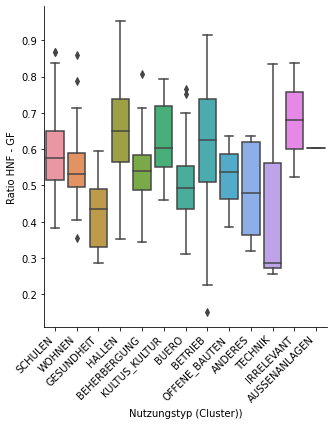

In [145]:
# TODO: Uses SIA 416 only
df['ratio_hnf_gf'] = df.eval(f'{im.FIELD_AREA_MAIN_USAGE} / {im.FIELD_AREA_TOTAL_FLOOR_416}')
gf = sns.catplot(x=im.FIELD_USAGE_CLUSTER, y="ratio_hnf_gf", kind="box", data=df)

gf.set(xlabel='Nutzungstyp (Cluster))', ylabel='Ratio HNF - GF')
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='normal',
    fontsize='medium'
)